# Universidad Nacional de Loja





**Carrera de Ingeniería en Sistemas**

OCTUBRE 2021 – ABRIL 2022



**Autores:**

*   Josue Andres Macas Caraguay
*   Jorge Gustavo Tandazo Cueva

# **1. Introducción**

La implementación de modelos de aprendizaje automático es el proceso de hacer que los modelos estén disponibles en producción donde las aplicaciones web, el software empresarial y las API pueden consumir el modelo entrenado proporcionando nuevos puntos de datos y generando predicciones.

Normalmente, los modelos de aprendizaje automático se construyen para que puedan usarse para predecir un resultado (valor binario, es decir, 1 o 0 para  Clasificación , valores continuos para  Regresión , etiquetas para  Agrupación ,  etc. Hay dos formas generales de generar predicciones (i) predecir por lote y (ii) predecir en tiempo real. En este Trabajo, veremos cómo implementar un modelo de aprendizaje supervisado y no supervisado.

# **2. Problema de negocio**

Uno de los principales problemas de nuestro conjunto de datos es que, a partir de nuestros datos, un usuario de Netflix no puede entender qué película o programa de televisión ver que sea similar al que vio anteriormente. El otro problema principal es que, cuando se estrena una nueva película o programa de televisión, se tarda en ver su calificación en IMDb. Sin embargo, sería estupendo que tuviéramos un algoritmo de predicción para que las películas recién estrenadas pudieran predecir sus calificaciones en la IMDb.


# **3. Objetivo**

Construir una aplicación web, que permita generar la predicción del reinting en IMDb se una pelicula o serie recien añadida en la plataforma NETFLIX, mediante la seleccion del nombre de la pelicula o serie de TV.

# **4. Tareas**

* Entrenar y validar los modelos y desarrollar una canalización de aprendizaje  automático para la implementación.

* Crear un front-end en VUE.js básico con un formulario de entrada para variables independientes.

* Crear un back-end de la aplicación web utilizando FastAPI Framework.

# **5. Metodo a utilizar**

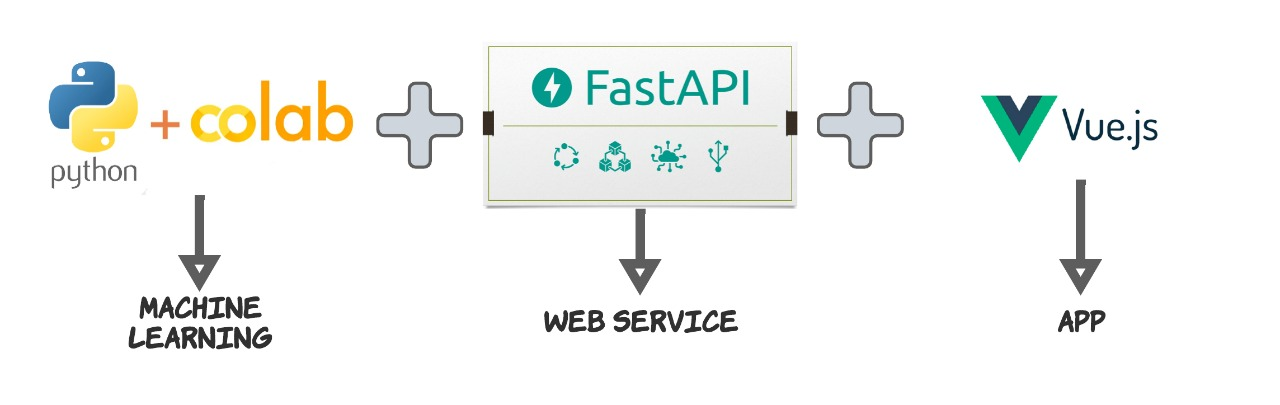

# **6. Desarrollo**

## **6.1 Importación de librerias**

In [ ]:
import numpy as np #da soporte para crear vectores y matrices grandes multidimensionales 
import pandas as pd #ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales
import matplotlib
import matplotlib.pyplot as plt #biblioteca para la generación de gráficos
import seaborn as sns #librería de visualización de datos para Python desarrollada sobre matplotlib

from joblib import dump, load
%matplotlib inline

## **6.2 Lectura de dataset**

In [ ]:
dataset =  pd.read_csv("/content/dataset_final.csv") #lee el archivo de Netflix con los datos

In [ ]:
dataset.head(10)

IMDb Title ID  ...                                              Genre
0     tt0007338  ...                       Action & Adventure, Comedies
1     tt0012382  ...                          Comedies, Romantic Movies
2     tt0013704  ...                                           Comedies
3     tt0015684  ...                                         Reality TV
4     tt0016123  ...                  Horror Movies, Independent Movies
5     tt0016338  ...  Crime TV Shows, International TV Shows, TV Dramas
6     tt0018397  ...                                             Dramas
7     tt0018455  ...                       Dramas, International Movies
8     tt0020144  ...       International TV Shows, TV Dramas, TV Horror
9     tt0020640  ...                 Children & Family Movies, Comedies

[10 rows x 15 columns]

## **6.3 Matrices de correlación**

Antes de iniciar el aprendizaje automático y las correlaciones de Spearman y Pearson, se realiza una codificación para cambiar las columnas que contienen valores de cadena por columnas que contienen valores enteros.

Despues se crea un marco de datos que contiene valores enteros codificados. Este marco de datos de enteros se utiliza para los algoritmos de Sklearn. (No se codifica el Cast y Description debido a su larga estructura de frases. Se implementa el vectorizador de conteo para poder usar esas características).

In [ ]:
#codificacion de los datos srt a int
from sklearn.preprocessing import OrdinalEncoder
dataset_int=dataset.copy()
ord_enc = OrdinalEncoder()
dataset_int["country_code"] = ord_enc.fit_transform(dataset_int[["Country"]])
#dataset_int[["Country", "country_code"]]
dataset_int["language_code"] = ord_enc.fit_transform(dataset_int[["Language"]])
#dataset_intt["IMDb title_code"] = ord_enc.fit_transform(dataset_int[["IMDb Title ID"]])
dataset_int["title_code"] = ord_enc.fit_transform(dataset_int[["Title"]])
dataset_int["director_code"] = ord_enc.fit_transform(dataset_int[["Director"]])
dataset_int["type_code"] = ord_enc.fit_transform(dataset_int[["Type"]])
dataset_int["budget_code"] = ord_enc.fit_transform(dataset_int[["Budget"]])
#dataset_int["cast_code"] = ord_enc.fit_transform(dataset_int[["Cast"]])
dataset_int["rating_code"] = ord_enc.fit_transform(dataset_int[["Rating"]])
dataset_int["genre_code"] = ord_enc.fit_transform(dataset_int[["Genre"]])

dataset_int.drop(["IMDb Title ID","Country","Language","Director","Description","Budget","Type","Cast","Rating","Genre"], axis=1,inplace= True)
dataset_int.head(10)

Title  Duration  IMDb Rating  ...  budget_code  rating_code  genre_code
0  Sherlock Holmes       116          6.4  ...        288.0          5.0        10.0
1        Leap Year        56          6.1  ...        288.0          4.0       133.0
2         The Trap        60          6.0  ...        288.0          9.0        99.0
3       The Circle        71          6.3  ...        288.0          9.0       253.0
4      The Monster        86          6.2  ...        288.0          6.0       200.0
5              She        98          6.1  ...        288.0          9.0       141.0
6         The Show        76          6.9  ...        288.0          9.0       165.0
7           Aurora        94          8.1  ...         51.0          9.0       180.0
8         Marianne        80          5.6  ...        288.0          9.0       242.0
9  Animal Crackers        97          7.5  ...        288.0         12.0        64.0

[10 rows x 13 columns]

### **6.3.1 Correlaciones de Pearson y Spearman**

Los valores P de la correlación de Spearman son más altos que los de la correlación de Pearson, porque en la mayoría de las relaciones bilaterales los datos se concentran en algunas regiones. Por lo tanto, el valor P de Pearson (que se centra en la linealidad) es menor que el de Spearman en la mayoría de las relaciones bilaterales. Las relaciones más destacadas son la duración y el rating, la duración y el país, y el presupuesto y los votos en términos de valores P, mientras que las relaciones sin sentido, como el idioma y el país, no se tuvieron en cuenta.

### **6.3.2 Pearson**

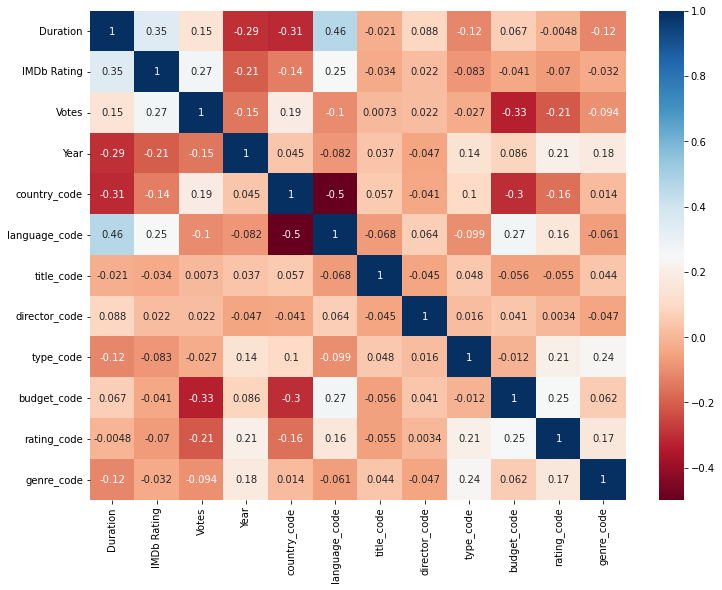

In [ ]:
from matplotlib import cm 
plt.figure(figsize=(12, 9))
corr = dataset_int.corr(method="pearson")
heat=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap=cm.RdBu,annot=True)

### **6.3.3 Spearman**

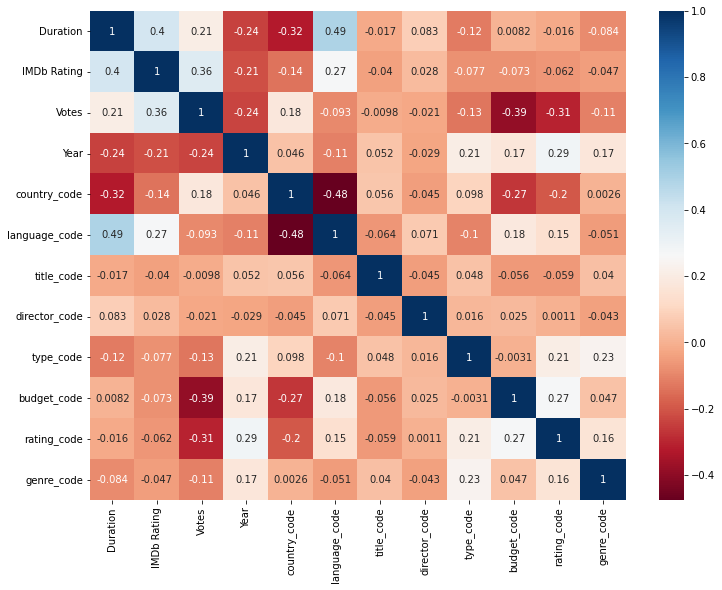

In [ ]:
from matplotlib import cm 
plt.figure(figsize=(12, 9))
corr = dataset_int.corr(method="spearman")
heat=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap=cm.RdBu,annot=True)

## **6.4 Algoritmos de modelamiento supervisado y no supervisado**

### **6.4.1 Modelos no supervisados**

#### **Algoritmo De Recomendación** 

En este caso, para utilizar las columnas Género, Reparto y Descripción en nuestro modelo de aprendizaje automático, implementamos el vectorizador de conteo. Al utilizar el vectorizador de recuento, aumentamos la dimensionalidad de nuestro marco de datos para analizar esas columnas. En la parte de knn se dará información más detallada sobre el vectorizador de recuento.
Utilizando también estas 3 columnas, los clusters que se visualizan en el gráfico de dispersión se separan de forma más distinguida. Por lo tanto, se indica que el uso de las características de género, reparto y descripción dio lugar a una mejor separación de los clusters. También se puede deducir que estas tres columnas son importantes para detectar películas y programas de televisión similares.

In [ ]:
moviess = dataset.copy()
moviess["Genre"] =moviess["Genre"].str.replace(",", "")
moviess["Genre"] =moviess["Genre"].str.replace("&", "")
moviess["Cast"] = moviess["Cast"].str.replace(","," ")
moviess["Description"]

import re
def remove_non_alpha(s):
  #Eliminar los caracteres no alfanuméricos
  s = re.sub ('[\W]+', ' ', s.lower())
  return s

moviess["Cast"] =moviess["Cast"].apply(remove_non_alpha)
moviess["Description"]= moviess["Description"].apply(remove_non_alpha)
moviess["Genre"]  = moviess["Genre"].apply(remove_non_alpha)

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

def remove_stop_words(s):
  return " ".join([item for item in s.split() if item not in stop])

moviess["Cast"] = moviess["Cast"].apply(remove_stop_words)
moviess["Description"] = moviess["Description"].apply(remove_stop_words)
moviess["Genre"] = moviess["Genre"].apply(remove_stop_words)

from sklearn.feature_extraction.text import CountVectorizer

# creación del vectorizador
vectorizerr = CountVectorizer()

# extraer la entrada y la salida
XX = vectorizerr.fit_transform(moviess["Cast"])
XX_a = vectorizerr.fit_transform(moviess["Description"])
XX_b = vectorizerr.fit_transform(moviess["Genre"])
XX.shape
XX_a.shape
XX_b.shape

dfcc = moviess.copy()
abb =pd.concat([dfcc.reset_index(), pd.DataFrame(XX.todense())],axis = 1)
bcc = pd.concat([abb.reset_index(), pd.DataFrame(XX_a.todense())],axis = 1)
cdd = pd.concat([bcc, pd.DataFrame(XX_b.todense())],axis = 1)

framee =pd.merge(left=dataset_int, right=cdd, left_on='Title', right_on='Title')
framee = framee.drop(["IMDb Title ID", "Duration_y", "Country", "Language", "Director", "Description", "IMDb Rating_y", "Votes_y", "Budget","Type","Cast","Year_y","Rating","Genre","index","level_0"],axis = 1)
#framee['IMDB_label'] = label_list
print(framee.head(2))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
             Title  Duration_x  IMDb Rating_x  Votes_x  ...  39  40  41  42
0  Sherlock Holmes         116            6.4      313  ...   0   0   0   0
1        Leap Year          56            6.1      268  ...   0   0   0   0

[2 rows x 24193 columns]


In [ ]:
from google.colab import data_table
data_table.DataTable(framee)

#### **Algoritmo K-means**

K-means es un algoritmo de agrupación no supervisado. Realizamos la agrupación de k-means para agrupar películas y programas de televisión similares. Antes de realizar el clustering de k-means, realizamos el método del codo para encontrar el número óptimo de clusters para nuestros datos. Según el método del codo, el número óptimo de clusters es casi 10. El número de clusters puede aumentarse si queremos más clusters que contengan menos películas. En nuestro proyecto hemos utilizado el número óptimo de clusters recomendado por el método del codo, que es casi 10.

[[1.1600e+02 6.4000e+00 3.1300e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [5.6000e+01 6.1000e+00 2.6800e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [6.0000e+01 6.0000e+00 1.1800e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [9.2000e+01 3.7000e+00 1.2990e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [9.7000e+01 3.5000e+00 3.2600e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [8.8000e+01 5.1000e+00 1.0627e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


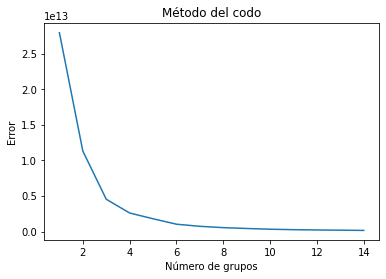

In [ ]:
Error =[]
from sklearn.cluster import KMeans
x_ = framee.iloc[:, 1:20102].values
print(x_)
#regresar el valor a uno
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i).fit(x_)
    kmeans.fit(x_)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 15), Error)
plt.title('Método del codo')
plt.xlabel('Número de grupos')
plt.ylabel('Error')
plt.show()

Realizamos el clustering de k-means y según el método del codo, elegimos el número de clusters como 10. De la agrupación de k-means obtenemos una matriz (y_kmeans10) que almacena los clusters de las películas respectivamente

In [ ]:
import numpy
from sklearn.cluster import KMeans
x = dataset_int.iloc[:, 1:20102].values
kmeans10 = KMeans(n_clusters=10)
y_kmeans10 = kmeans10.fit_predict(x)
centers = kmeans10.cluster_centers_
print(kmeans10)
y_kmeans10

KMeans(n_clusters=10)


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Realizamos un análisis de componentes principales para reducir la dimensionalidad de los datos, con el fin de visualizar nuestro resultado de agrupación de k-means y mostrar los resultados de k-means en un gráfico de dispersión 2D.

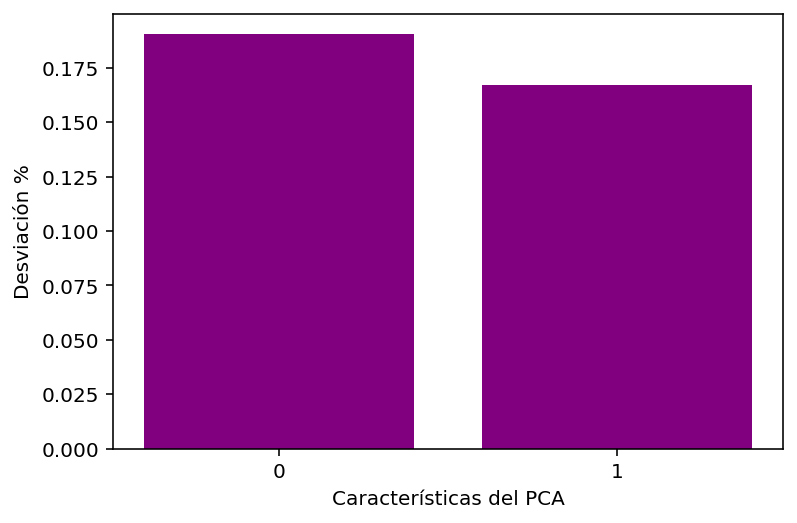

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
xx = dataset_int.iloc[:, 1:20102].values
X_std = StandardScaler().fit_transform(xx)
# Creacion de una instancia PCA: pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
# Representación de las varianzas explicadas
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='purple')
plt.xlabel('Características del PCA')
plt.ylabel('Desviación %')
plt.xticks(features)
# Almacenamiento de los componentes en un DataFrame
PCA_components = pd.DataFrame(principalComponents)

Hemos utilizado los componentes principales para visualizar nuestros datos en dos dimensiones mediante un gráfico de dispersión. A primera vista, es difícil ver todos los clusters, pero también se pueden distinguir algunos de ellos.

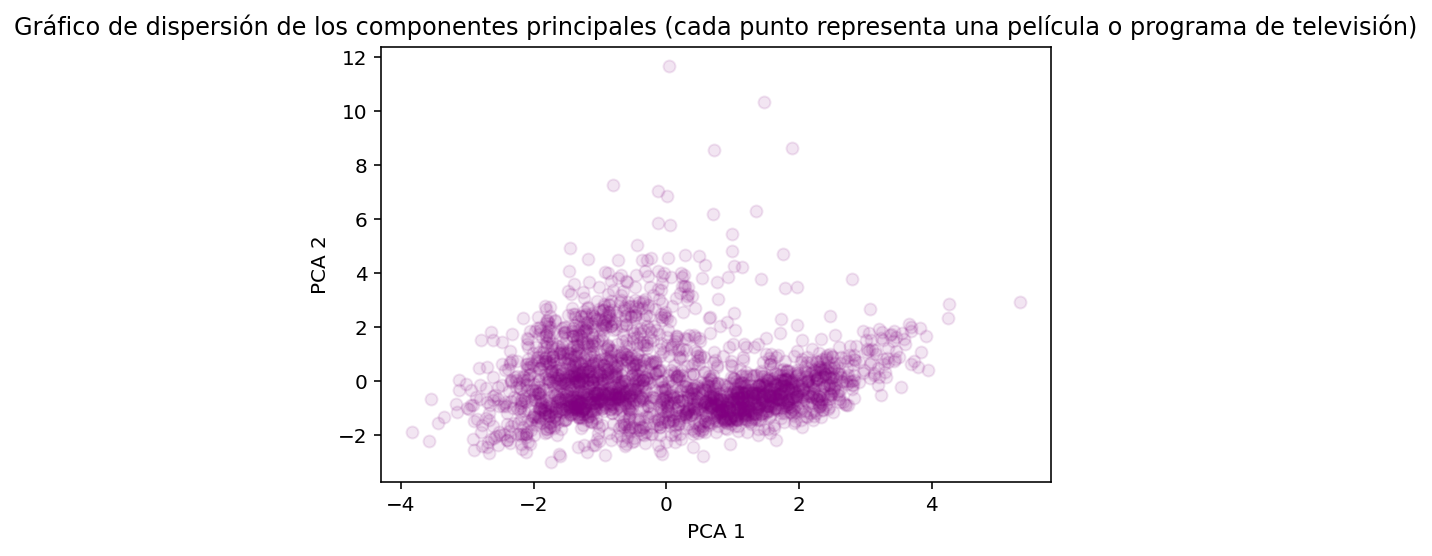

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='purple')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("Gráfico de dispersión de los componentes principales (cada punto representa una película o programa de televisión)")
plt.show()

Mostramos los clusters en el gráfico de dispersión. El algoritmo de agrupación de K-means trata de hacer que los puntos de datos intraclúster sean lo más parecidos posible, a la vez que mantiene los clústeres lo más alejados posible y trata de separar los clústeres esféricamente. Por lo tanto, el resultado es la siguiente figura. Cada color representa un clúster y cada punto representa una película o programa de televisión.

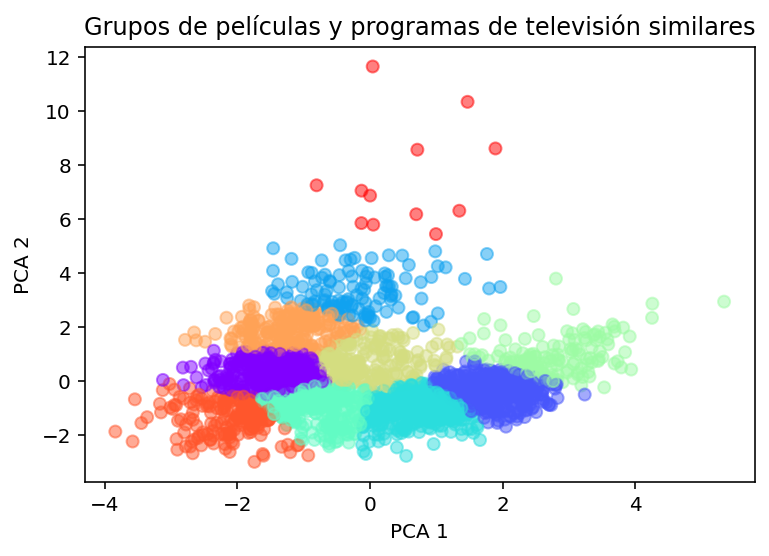

In [ ]:
_x_ = PCA_components.iloc[:, [0,1]].values
kmeans10 = KMeans(n_clusters=10)
y_kmeans10 = kmeans10.fit_predict(_x_)
kmeans10.cluster_centers_
plt.scatter(_x_[:,0], _x_[:,1], c=y_kmeans10, cmap='rainbow', alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("Grupos de películas y programas de televisión similares")
plt.show()

#### **Similitud del coseno**

En la similitud del coseno, para cada fila basada en su título ponemos 10 columnas (Duración, País, Idioma, Director, Descripción, Clasificación IMDb, Reparto, Año, Clasificación, Género) en una columna ("Todas las columnas") para representar nuestra bolsa de palabras. Eliminamos todas las comas y puntos porque no los queremos en el recuento para que no afecten al resultado. También cambiamos el tipo de calificación de IMDb de doble a entero para un mejor rendimiento en la similitud.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cosine_result=dataset.copy()
cosine_result['Description']=cosine_result['Description'].str.replace(',','').str.replace('.', '').str.lower()
cosine_result['Cast']=cosine_result['Cast'].str.replace(',','').str.replace('.', '').str.lower()
cosine_result['Genre']=cosine_result['Genre'].str.replace(',','').str.lower()
cosine_result['Language']=cosine_result['Language'].str.replace(',','')
cosine_result['IMDb Rating']=cosine_result['IMDb Rating'].astype(int)
cosine_result['IMDb Rating']=cosine_result['IMDb Rating'].astype(str)
cosine_result['Year']=cosine_result['Year'].astype(str)
cosine_result['Duration']=cosine_result['Duration'].astype(str)
cosine_result['Rating']=cosine_result['Rating'].astype(str)

def combine_columncontent(row):
    return row['Duration'] +  " " + row['Country'] + " " + row['Language'] + " " + row['Director'] + " " +row['Description']+ " " +row['IMDb Rating']+ " " +row['Cast']+ " " +row['Year']+ " " +row['Rating']+ " " +row['Genre']       


cosine_result['All Columns'] = cosine_result.apply(combine_columncontent, axis=1)
count_matrix = cv.fit_transform(cosine_result['All Columns'])

cos_sim = cosine_similarity(count_matrix)
cosine_result.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


IMDb Title ID  ...                                        All Columns
0     tt0007338  ...  116 USA English Arthur Berthelet when a couple...
1     tt0012382  ...  56 USA English James Cruze, Roscoe 'Fatty' Arb...

[2 rows x 16 columns]

In [ ]:
csv = pd.DataFrame(cosine_result)
csv.to_csv('dataset_letters.csv',index = False)

Veamos nuestra matriz de similitud. La matriz es simétrica porque la similitud entre A y B es igual también a la similitud en B y A. Además, aquí los números diagonales son 1, como se esperaba, porque cada contenido (película y tv) son idénticos a sí mismos.

In [ ]:
cos_sim

array([[1.        , 0.17868677, 0.16841558, ..., 0.07801081, 0.23723496,
        0.16372434],
       [0.17868677, 1.        , 0.21612702, ..., 0.08470927, 0.12122604,
        0.23704354],
       [0.16841558, 0.21612702, 1.        , ..., 0.09435642, 0.15191091,
        0.13201967],
       ...,
       [0.07801081, 0.08470927, 0.09435642, ..., 1.        , 0.06880209,
        0.01681682],
       [0.23723496, 0.12122604, 0.15191091, ..., 0.06880209, 1.        ,
        0.19553847],
       [0.16372434, 0.23704354, 0.13201967, ..., 0.01681682, 0.19553847,
        1.        ]])

Después de ese paso, crearemos una serie de Títulos con índices numerados asignados para emparejarlos con los de la matriz de similitud. Creamos una puntuación basada en su similitud y los ordenamos de mayor a menor similitud. Además, eliminamos el primer valor de la lista de similitudes por no devolver el mismo contenido que introdujo el usuario. Así que al final, cuando tomamos un título de película o programa de televisión como entrada, nos recomendará los 5 más similares por sus características que hemos añadido anteriormente 

In [ ]:
features = cosine_result[['Title']].reset_index()

def recommend(movie): 
    
    content_title = features[features['Title'] == movie].index[0] 
    features.sort_index(inplace=True)
    
    sim_scores = pd.Series(cos_sim[content_title]).sort_values(ascending=False) 
  
    simbtw_content = pd.DataFrame({ 'Score' : sim_scores[1:100]}).reset_index() 
    simbtw_content = simbtw_content.merge(features) 
    simbtw_content = simbtw_content[['Title','Score']] 
    
    return simbtw_content

Ahora escribamos nuestra película que queríamos que nos recomendaran y veamos las 5 primeras películas similares.

In [ ]:
recommend('Sherlock Holmes').head()

Title     Score
0                    Hickok  0.348052
1            Viking Destiny  0.343248
2  Pup Star: Better 2Gether  0.338112
3                      Race  0.336184
4       The Black Godfather  0.333361

## **6.5 Modelos supervisados: clasificación y regresión**

A continuacion se implementa algunos algoritmos de clasificación y regresión para predecir la calificación IMDb de una película.

### **6.5.1 Modelos de clasificación**

#### Clasificación Random Forest

Para la clasificación, seleccionamos la etiqueta como las calificaciones de IMDb para predecir. Pero en la clasificación, puede predecir valores descretos. Por lo tanto, separamos las calificaciones de IMDb en 4 categorías discretas.

In [ ]:
label_list = []
for i in range(len(dataset)):
  if dataset.iloc[i,7] <= 5.0:
    label_list.append(int(0))
  elif dataset.iloc[i,7] > 5.0 and dataset.iloc[i,7] <=7.0:
    label_list.append(int(1))
  elif dataset.iloc[i,7] > 7.0 and dataset.iloc[i,7] < 8.0:
    label_list.append(int(2))
  elif dataset.iloc[i,7] >= 8.0 and dataset.iloc[i,7] <=10.0:
    label_list.append(int(3))
dataset_int_label = dataset_int.copy()
dataset_int_label['IMDB_label'] = label_list

Después de crear nuestra etiqueta que tiene valores discretos de IMDb, realizamos la clasificación Random Forest. El algoritmo Random Forest crea árboles de decisión sobre las muestras de datos y, a continuación, obtiene la predicción de cada uno de ellos y, finalmente, selecciona la mejor solución mediante una votación. En la celda de abajo, su determinan las etiquetas y las características. X_ representa las características e y_ representa la columna de etiquetas.

In [ ]:
X_ = dataset_int_label.iloc[:, [2,3,4,5,6,7,8,9,10,11,12]].values
y_ = dataset_int_label.iloc[:, 13].values
dataset_int_label.head(5)

Title  Duration  IMDb Rating  ...  rating_code  genre_code  IMDB_label
0  Sherlock Holmes       116          6.4  ...          5.0        10.0           1
1        Leap Year        56          6.1  ...          4.0       133.0           1
2         The Trap        60          6.0  ...          9.0        99.0           1
3       The Circle        71          6.3  ...          9.0       253.0           1
4      The Monster        86          6.2  ...          6.0       200.0           1

[5 rows x 14 columns]

In [ ]:
#x_

In [ ]:
#y_

En las dos celdas siguientes, nuestros datos se dividieron en prueba y entrenamiento. A continuación, se implementó el clasificador Random Forest.

In [ ]:
#Division de los datos para prueba y entrenamiento
from sklearn.model_selection import train_test_split
Xtrainn, Xtestt, ytrainn, ytestt = train_test_split(X_, y_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(Xtrainn, ytrainn)

RandomForestClassifier(random_state=42)

A continuación puede ver los resultados después de utilizar nuestro clasificador Random Forest en los datos de prueba. La precisión es de aproximadamente 0,61. Para mejorar el rendimiento de nuestro algoritmo y aumentar la precisión, utilizamos diferentes métodos como el uso de hiperparámetros y el uso de algunas características importantes también.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
ypredd_test = rf.predict(Xtestt)
print('Matriz de confusión de prueba: ')
print(confusion_matrix(ytestt, ypredd_test))
print('')
print('')
print('Informe de clasificación de las pruebas:')
print(classification_report(ytestt, ypredd_test))

rf_acc = accuracy_score(ytestt, ypredd_test)
print("Precisión de Random Forest:"+str(rf_acc))


Matriz de confusión de prueba: 
[[126   0   0   0]
 [  0 358   0   0]
 [  0   0  78   0]
 [  0   0   4  22]]


Informe de clasificación de las pruebas:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00       358
           2       0.95      1.00      0.97        78
           3       1.00      0.85      0.92        26

    accuracy                           0.99       588
   macro avg       0.99      0.96      0.97       588
weighted avg       0.99      0.99      0.99       588

Precisión de Random Forest:0.9931972789115646


Aquí identificamos las características más importantes de nuestro conjunto de datos para el clasificador Random Forest. Es decir, estas características son las más significativas que afectan a la precisión de nuestro algoritmo macnine. Por lo tanto, es útil conocer estas características importantes con el fin de obtener un mejor valor de precisión de nuestro algoritmo de clasificación.

[('Title', 0.762), ('Duration', 0.067), ('Year', 0.03), ('language_code', 0.025), ('budget_code', 0.025), ('IMDb Rating', 0.023), ('country_code', 0.023), ('Votes', 0.02), ('director_code', 0.014), ('type_code', 0.009), ('title_code', 0.001)]
Característica: Title   Importancia: 0.762
Característica: Duration   Importancia: 0.067
Característica: Year   Importancia: 0.03
Característica: language_code   Importancia: 0.025
Característica: budget_code   Importancia: 0.025
Característica: IMDb Rating   Importancia: 0.023
Característica: country_code   Importancia: 0.023
Característica: Votes   Importancia: 0.02
Característica: director_code   Importancia: 0.014
Característica: type_code   Importancia: 0.009
Característica: title_code   Importancia: 0.001


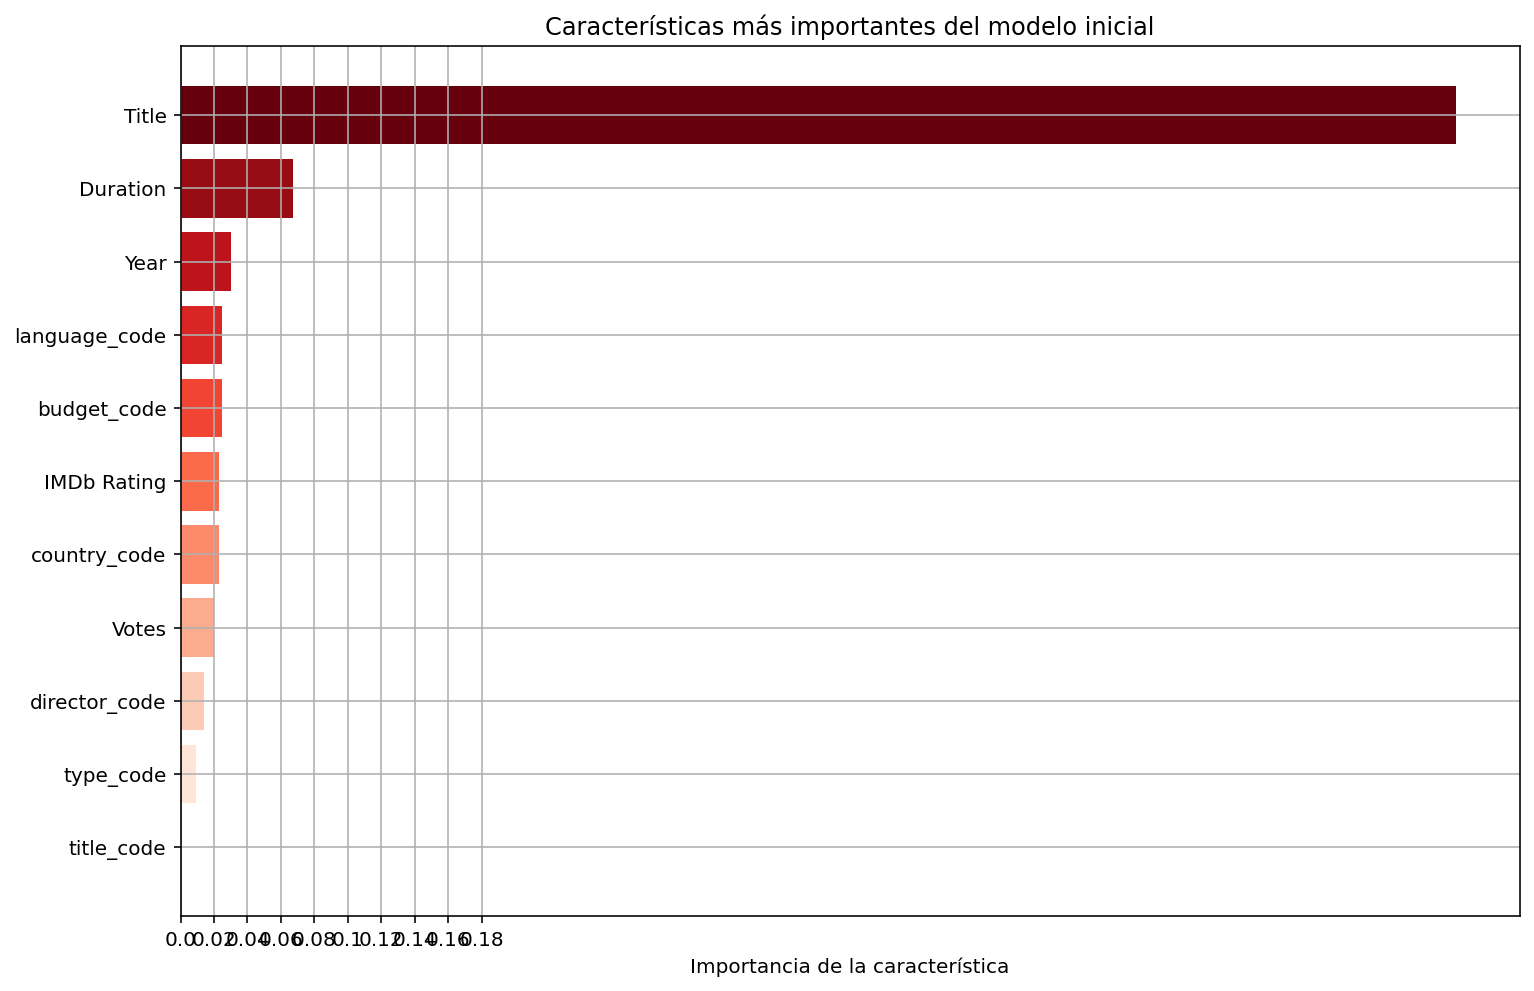

In [ ]:
from matplotlib import cm
# 
feature_list = dataset_int_label.columns
importances = list(rf.feature_importances_)
feature_importance = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importance, key = lambda x: x[1], reverse = True)
print(feature_importances)
for pair in feature_importances[:25]:
  print("Característica: {:2}   Importancia: {}".format(*pair))
feat = feature_importances[:25]
listt = []
for i in range(len(feat)):
  listt.append(feat[i][0]) 
imp = [] 
for i in range(len(feat)):
  imp.append(feat[i][1]) 
listtt=np.arange(start=0,stop=0.183,step=0.02)
c = plt.cm.Reds_r(np.linspace(0,1,len(feat)))
fig, ax =plt.subplots(figsize=(12,8))
ax.set_xticks(listtt)
ax.set_xticklabels(listtt)
ax.invert_yaxis()
plt.barh(listt,imp,color=c)
#plt.grid()
ax.grid(zorder=0)
plt.title('Características más importantes del modelo inicial')
plt.xlabel('Importancia de la característica')
plt.show()

Los parámetros sintonizados hiperparamétricamente juegan un papel importante en la producción de resultados de alta precisión cuando se utiliza el clasificador Random Forest. En esta parte, se realizó el resultado de la clasificación bajo los parámetros óptimos de Random Forest. Por lo tanto, el valor de exactitud que se obtuvo del bosque aleatorio se incrementó.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion' :['entropy'],'min_samples_split': [2,5,10],'n_estimators': [100, 200, 300, 400, 600]}
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
rf_grid.fit(Xtrainn, ytrainn)
rf_grid.best_params_
grid_preds = rf_grid.predict(Xtestt)
acc_hyp = accuracy_score(ytestt, grid_preds)
acc_hyp

0.9931972789115646

En este caso, utilizamos el marco de datos "framee" que se construye mediante la implementación del vectorizador de contadores y este marco de datos incluye también las características de Género, Reparto y Descripción. En la parte de knn se dará información más detallada sobre la implementación del vectorizador de contadores.
Utilizando también estas 3 columnas, el valor de la precisión aumentó y llegó a cerca de 0,68. Por lo tanto, se puede deducir que el género, el reparto y la descripción son características importantes para determinar el índice IMDb de una película o programa de televisión.

In [ ]:
framee['IMDB_label'] = label_list

XX_ = framee.iloc[:, 1:20102].values
yy_ = framee.iloc[:, 20102].values
dataset_int_label.head(2)
from sklearn.model_selection import train_test_split
XXtrainn, XXtestt, yytrainn, yytestt = train_test_split(XX_, yy_)

from sklearn.ensemble import RandomForestClassifier
rff = RandomForestClassifier(n_estimators=100, random_state=42)
rff.fit(XXtrainn, yytrainn)
ypredd_testt = rff.predict(XXtestt)

print('Matriz de confusión de la prueba: ')
print(confusion_matrix(yytestt, ypredd_testt))
print('')
print('')
print('Informe de clasificación de las pruebas:')
print(classification_report(yytestt, ypredd_test))

rf_acc_cv = accuracy_score(yytestt, ypredd_testt)

print("Precisión de Random Forest:"+str(rf_acc_cv))

Matriz de confusión de la prueba: 
[[588]]


Informe de clasificación de las pruebas:
              precision    recall  f1-score   support

           0       1.00      0.21      0.35       588
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.21       588
   macro avg       0.25      0.05      0.09       588
weighted avg       1.00      0.21      0.35       588

Precisión de Random Forest:1.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **KNN**

Antes de iniciar el KNN, organizamos el método de clasificación en Duración, Votos y Año.

Clasificamos la calificación de Imdb que es nuestra "etiqueta" en el aprendizaje automático.

*  La clasificación se hace con las calificaciones de Imdb
*  Si es inferior a 5 es una mala película / serie de televisión
*  Si está entre 5 y 7 es una película/serie de televisión normal
*  Si está entre 7 y 8 es una buena película/serie de televisión
*  Si está entre 8 y 10 se considera una película/serie legendaria

In [ ]:
def ımdbclasification(row):
    if  row <= 5.0:
      return 0
    elif row > 5.0 and row <= 7.0:
      return 1;
    elif row > 7.0 and row < 8.0:
      return 2;
    elif row >= 8.0 and row <= 10.0:
      return 3;
dataset["label"] = dataset["IMDb Rating"].apply(ımdbclasification)
dataset.head(5)

IMDb Title ID            Title  ...                              Genre label
0     tt0007338  Sherlock Holmes  ...       Action & Adventure, Comedies     1
1     tt0012382        Leap Year  ...          Comedies, Romantic Movies     1
2     tt0013704         The Trap  ...                           Comedies     1
3     tt0015684       The Circle  ...                         Reality TV     1
4     tt0016123      The Monster  ...  Horror Movies, Independent Movies     1

[5 rows x 16 columns]

In [ ]:
bad_content=0
normal_content=0
good_content=0
legend_content=0
for i in dataset.index:
  if dataset["label"][i]==0:
    bad_content=bad_content+1
  elif dataset["label"][i]==1:
    normal_content=normal_content+1    
  elif dataset["label"][i]==2:
    good_content=good_content+1
  elif dataset["label"][i]==3:
    legend_content=legend_content+1
  
  i=i+1
print("Número de contenidos malos en Netflix: ",bad_content)  
print("Número de contenidos normales en Netflix: ",normal_content)  
print("Número de contenidos buenos en Netflix: ",good_content)  
print("Número de contenidos legendarios en Netflix: ",legend_content)  

Número de contenidos malos en Netflix:  516
Número de contenidos normales en Netflix:  1374
Número de contenidos buenos en Netflix:  368
Número de contenidos legendarios en Netflix:  91


Crear otra clasificación por años
*  Si se crea antes de los 50 es una película/serie de televisión demasiado antigua
*  Si es creada entre los 50's y los 80's es una película/serie vieja
*  Si es creada entre los 80's y los 00's sigue siendo vieja pero un poco.
*  Si se crea entre los años 00 y 20 se considera nueva

In [ ]:
def yearclasification(row):
    if  row <= 1950:
      return 0
    elif row > 1950 and row <= 1980:
      return 1;
    elif row > 1980 and row < 2000:
      return 2;
    elif row >= 2000 and row <= 2020:
      return 3;
#dataset["year"].astype(int)
dataset["year_classification"] = dataset["Year"].apply(yearclasification)

Impresión del número de clasificación del año

In [ ]:
yc_0=0
yc_1=0
yc_2=0
yc_3=0
for i in dataset.index:
  if dataset["year_classification"][i]==0:
    yc_0=yc_0+1
  elif dataset["year_classification"][i]==1:
    yc_1=yc_1+1    
  elif dataset["year_classification"][i]==2:
    yc_2=yc_2+1
  elif dataset["year_classification"][i]==3:
    yc_3=yc_3+1
  
  i=i+1
print("Películas demasiado antiguas  ",yc_0)  
print("Películas y series de televisión antiguas ",yc_1)  
print("Películas y series de televisión un poco antiguas  ",yc_2)  
print("Películas y series de televisión recientes: ",yc_3)  

Películas demasiado antiguas   1
Películas y series de televisión antiguas  34
Películas y series de televisión un poco antiguas   113
Películas y series de televisión recientes:  2148


Hemos dividido los contenidos por su duración, que es la siguiente
*  Si es inferior a 60 minutos película/serie de televisión corta
* Si está entre 60 y 120 minutos es una película/serie de televisión de duración normal
*  Si es más de 2 horas es una película/serie de televisión de larga duración

In [ ]:
def durationclasification(row):
    if  row <= 60:
      return 0
    elif row > 60 and row <= 120:
      return 1;
    elif row > 120 :
      return 2;
    
#dataset["year"].astype(int)
dataset["duration_classification"] = dataset["Duration"].apply(durationclasification)
dataset.head(2)

IMDb Title ID            Title  ...  year_classification duration_classification
0     tt0007338  Sherlock Holmes  ...                  3.0                       1
1     tt0012382        Leap Year  ...                  3.0                       0

[2 rows x 18 columns]

Clasificación de los votos entre las películas y las series
*  Cuando comprobamos los datos, vemos que hay una gran distribución de votos entre los contenidos, por lo que los dividimos en 4 clases diferentes
*  En primer lugar, si la película tiene menos de 1.000 votos, es una película/serie poco votada.
*  Si se vota entre 1000 y 5000 personas se considera de nivel medio
*  Si se vota entre 5.000 y 10.000 personas, se acerca más a una película muy votada, pero sigue siendo de nivel medio.
*  Si es votada por más de 10.000 personas también es de nivel alto.

In [ ]:
def votes(row):
  if row <= 1000:
    return 0
  elif row > 1000 and row <= 5000:
    return 1;
  elif row > 5000 and row <= 10000:
    return 2;
  else :
    return 3
dataset["votes_class"] = dataset["Votes"].apply(votes)
dataset["votes_class"]

0       0
1       0
2       0
3       0
4       0
       ..
2344    0
2345    1
2346    1
2347    0
2348    3
Name: votes_class, Length: 2349, dtype: int64

In [ ]:
dataset_int.head()

Title  Duration  IMDb Rating  ...  budget_code  rating_code  genre_code
0  Sherlock Holmes       116          6.4  ...        288.0          5.0        10.0
1        Leap Year        56          6.1  ...        288.0          4.0       133.0
2         The Trap        60          6.0  ...        288.0          9.0        99.0
3       The Circle        71          6.3  ...        288.0          9.0       253.0
4      The Monster        86          6.2  ...        288.0          6.0       200.0

[5 rows x 13 columns]

IMPRIMIR EL DATASER NUMERICO

In [ ]:
csv2 = pd.DataFrame(dataset_int)
csv2.to_csv('dataset_numbers.csv')

In [ ]:
#Información necesaria para usar Knn 
#Esto contiene para cada película, la clasificación de cada columna
all_numbers = dataset_int.copy()
all_numbers["votes_class"] =dataset["votes_class"]
all_numbers["label"] = dataset["label"]
all_numbers["duration_class"] = dataset["duration_classification"]
all_numbers["year_class"] =dataset["year_classification"]
all_numbers
all_numbers.drop("Duration",axis = 1,inplace = True)
all_numbers.drop("Votes",axis = 1,inplace = True)
all_numbers.drop("Year",axis = 1,inplace = True)
all_numbers.head(2)

Title  IMDb Rating  ...  duration_class  year_class
0  Sherlock Holmes          6.4  ...               1         3.0
1        Leap Year          6.1  ...               0         3.0

[2 rows x 14 columns]

**Regresión logística y vectorizador de contadores**

Para analizar los valores de las cadenas como el Género, el Reparto y la Descripción de los datos necesitamos abordar este problema con la ayuda de la regresión logística y el vectorizador de contadores

En este problema primero reemplazamos "," con la celda vacía ("") en la descripción, para inhibir cualquier problema. A continuación, vamos a utilizar la biblioteca llamada nltk en el procesamiento. Esta biblioteca contiene la mayoría de las palabras más comunes en el idioma Inglés, y descartarlos en nuestra lista para evaluar esta función mejor.

In [ ]:
movies = dataset.copy()

movies["Genre"] =movies["Genre"].str.replace(",", "")
movies["Genre"] =movies["Genre"].str.replace("&", "")

movies["Cast"] = movies["Cast"].str.replace(","," ")
movies["Description"]

0       When a couple of swindlers hold young Alice Fa...
1       A young man, heir to his misogynistic and mill...
2       A miner's happiness is destroyed when a rival ...
3       Elizabeth Cheney has a wealthy husband, social...
4       A meek clerk who doubles as an amateur detecti...
                              ...                        
2344    Jai Mummy Di is a light-hearted family comedy ...
2345    A young girl is drawn into a mystery involving...
2346    When a young man becomes possessed after playi...
2347    Set 25 years after, Jack is now working as a S...
2348    Twelve-year-old Kareem Manning hires a crimina...
Name: Description, Length: 2349, dtype: object

Esta función elimina los caracteres no alfanuméricos de la cadena dada

In [ ]:
import re

def remove_non_alpha(s):
  # eliminar los caracteres no alfanuméricos
  s = re.sub ('[\W]+', ' ', s.lower())

  return s

In [ ]:
movies["Cast"] =movies["Cast"].apply(remove_non_alpha)
movies["Description"]= movies["Description"].apply(remove_non_alpha)
movies["Genre"]  = movies["Genre"].apply(remove_non_alpha)

Esta función elimina la palabra más común en el conjunto de datos dado

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stop_words(s):
  return " ".join([item for item in s.split() if item not in stop])

In [ ]:
movies["Cast"] = movies["Cast"].apply(remove_stop_words)
movies["Description"] = movies["Description"].apply(remove_stop_words)
movies["Genre"] = movies["Genre"].apply(remove_stop_words)

Con la ayuda del CountVectorizer vamos a tener un array de lista que contiene cada cadena en una lista dada de 3 y si encontramos esa cadena en nuestra etiqueta entonces, incrementará este valor en 1, Mayormente contiene valores binarios como 1 y 0 pero por ejemplo, ya que en la descripción una palabra dada podría ocurrir más de una vez, podría haber diferentes valores como 2 o 3.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# creación del vectorizador
vectorizer = CountVectorizer()

# extraer la entrada y la salida
X = vectorizer.fit_transform(movies["Cast"])
X_a = vectorizer.fit_transform(movies["Description"])
X_b = vectorizer.fit_transform(movies["Genre"])
X.shape
X_a.shape
X_b.shape

(2349, 43)

Combinar los datos anteriores, que contienen valores enteros obtenidos tanto de la clasificación como de la codificación, con el nuevo vectorizador de contadores

In [ ]:
dfc = movies.copy()
ab =pd.concat([dfc.reset_index(), pd.DataFrame(X.todense())],axis = 1)
bc = pd.concat([ab.reset_index(), pd.DataFrame(X_a.todense())],axis = 1)
cd = pd.concat([bc, pd.DataFrame(X_b.todense())],axis = 1)

frame =pd.merge(left=all_numbers, right=cd, left_on='Title', right_on='Title')
frame.head(2)

Title  IMDb Rating_x  country_code  language_code  ...  39  40  41  42
0  Sherlock Holmes            6.4         269.0           22.0  ...   0   0   0   0
1        Leap Year            6.1         269.0           22.0  ...   0   0   0   0

[2 rows x 24214 columns]

El nombre "frame" contiene todos los valores que necesitamos utilizar en el aprendizaje automático, pero primero tenemos que eliminar las columnas innecesarias

In [ ]:
frame =frame.drop(["Title","IMDb Rating_x","index","IMDb Title ID","Duration","Country","Language","Director","Description","IMDb Rating_y","Votes","Budget","Type","Cast","Year","Rating","Genre"],axis = 1)

In [ ]:
frame = frame.drop(["label_x","level_0","label_y","votes_class_y","duration_classification","year_classification"],axis = 1)

Ahora estamos listos para utilizar estos valores en nuestro modelo de aprendizaje automático

In [ ]:
frame.head(5)

country_code  language_code  title_code  director_code  ...  39  40  41  42
0         269.0           22.0      1691.0          185.0  ...   0   0   0   0
1         269.0           22.0      1065.0          752.0  ...   0   0   0   0
2         269.0           22.0      2105.0         1549.0  ...   0   0   0   0
3         269.0           22.0      1907.0          584.0  ...   0   0   0   1
4         269.0           22.0      2037.0         1569.0  ...   0   0   0   0

[5 rows x 24191 columns]

#### **Precisión de KNN**

*  Como tenemos tanto la clasificación como la codificación en los datos dados, podemos utilizar el método knn en el aprendizaje automático.

*  En primer lugar, tomamos las etiquetas de las películas/series de televisión dadas como conjunto de datos combinados que serán nuestros valores Y

*  En segundo lugar, damos las entradas como valores X en el conjunto de datos combinados, que contienen la clasificación y la codificación.

Al final obtenemos la exactitud del knn en el parámetro K

In [ ]:
y = all_numbers["label"].values
#x = result[["duration_classification","year_classification",]].values  alttaki ile ortak eklememiz lazım
x = frame.values  
x = np.nan_to_num(x)

In [ ]:
print(x)

[[2.690e+02 2.200e+01 1.691e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.690e+02 2.200e+01 1.065e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.690e+02 2.200e+01 2.105e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [6.500e+01 1.770e+02 1.426e+03 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.690e+02 2.200e+01 3.490e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.690e+02 2.200e+01 4.340e+02 ... 0.000e+00 0.000e+00 0.000e+00]]


In [ ]:
#Clasificacion de los datos 
from sklearn.model_selection import train_test_split

# 80% para el entrenamiento y 20% para las pruebas de validación
x_train, x_remaining, y_train, y_remaining = train_test_split(x, y, test_size=0.20, random_state=42)
# 10% de validación, 10% de prueba
x_test, x_val, y_test, y_val = train_test_split(x_remaining, y_remaining, test_size=0.50, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
K_range = np.arange(1, 50)
#print(K_range)
accuracy_list = []

for k in K_range:
  # creacion de un nuevo modelo con el K actual
  knn = KNeighborsClassifier(k, metric="euclidean")
  # ajustar los datos de entrenamiento
  knn.fit(x_train, y_train)
  # predecir los datos de validación
  y_pred = knn.predict(x_val)
  # obtener el valor de precisión
  accuracy = accuracy_score(y_val, y_pred)
  accuracy_list.append(accuracy)

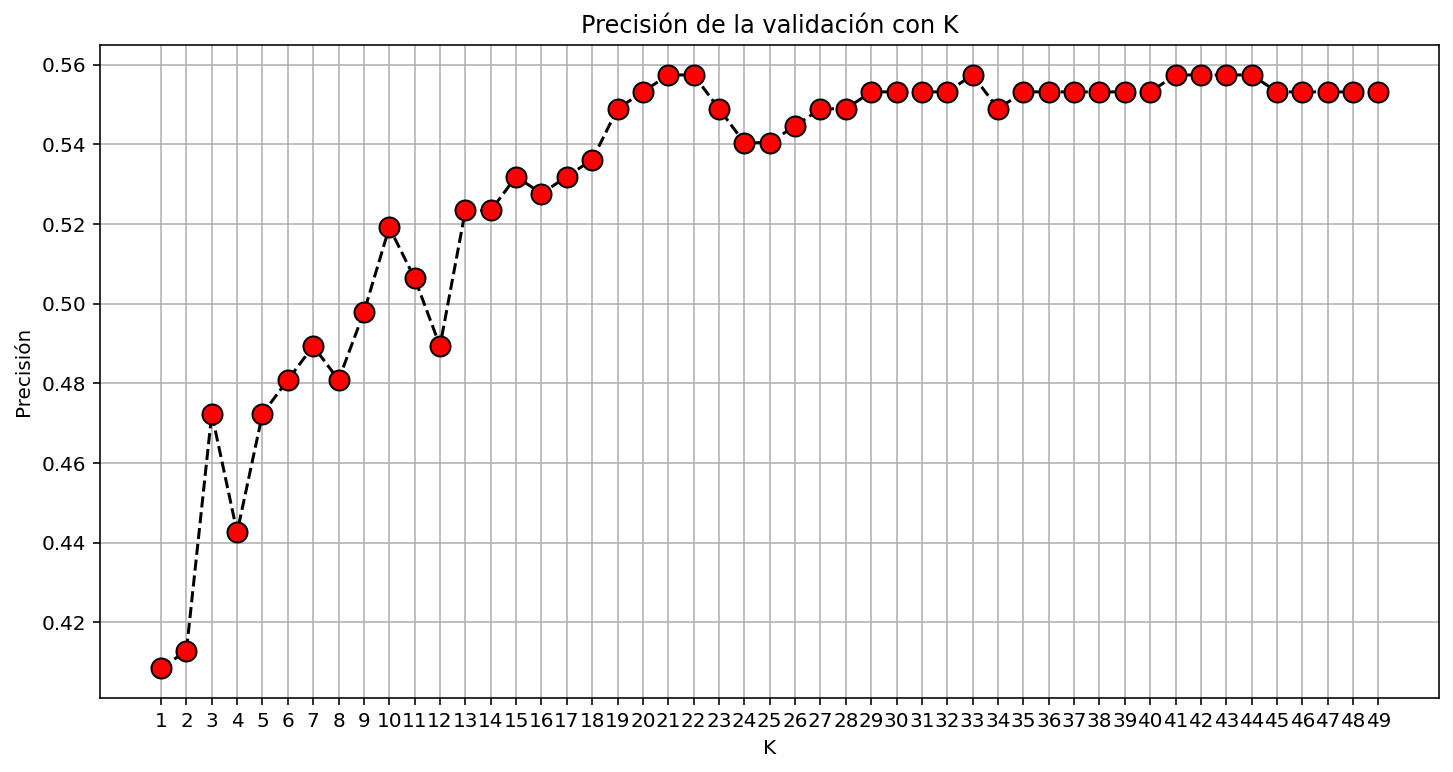

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Precisión de la validación con K')  
plt.xlabel('K')  
plt.ylabel('Precisión')
plt.xticks(K_range)
plt.grid()
plt.show()

Vemos que cuando el valor de k se incrementa de 1 a 17 hay un gran impacto en la puntuación de precisión, ya que aumentamos el número de vecinos, hay más posibilidades de evaluar con mayor precisión. Después de 17 todavía va alrededor de la exactitud similar, pero después de cierto punto va como linealmente en el valor K de 39.

In [ ]:
knn = KNeighborsClassifier(37, metric="euclidean")
# ajustar los datos de entrenamiento
knn.fit(x_train, y_train)
# predecir los datos de validación
y_pred = knn.predict(x_test)
# obtener el valor de la precisión
#knn_best = f"{accuracy_score(y_test, y_pred):.2f}"
knn_best = accuracy_score(y_test, y_pred)
print("Puntuacion de Precisión:")
print(knn_best)

Puntuacion de Precisión:
0.5446808510638298


También intentamos obtener una puntuación de precisión en el parámetro por defecto para evaluar la diferencia entre random forest y knn

In [ ]:
knn = KNeighborsClassifier(k, metric="euclidean")
# Ajuste de los datos de entrenamiento
knn.fit(x_train, y_train)
# Predecir los datos de validación
y_pred = knn.predict(x_test)
# Obtener el valor de la precisión
#knn_def = f"{accuracy_score(y_test, y_pred):.2f}"
knn_def = accuracy_score(y_test, y_pred)
print("Puntuacion de Precisión:")
print(knn_def)

Puntuacion de Precisión:
0.5446808510638298


### **6.5.2 Modelos de regresión**

#### Regresión lineal

Con este método, buscamos la relación entre x e y, donde y es la variable dependiente y x es la variable explicativa. Este método se utiliza para averiguar la relación de causa y efecto entre las variables.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset=dataset_int
X = dataset[['Votes','Duration','budget_code']]

y = dataset['IMDb Rating']

In [ ]:
x

array([[2.690e+02, 2.200e+01, 1.691e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.690e+02, 2.200e+01, 1.065e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.690e+02, 2.200e+01, 2.105e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [6.500e+01, 1.770e+02, 1.426e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.690e+02, 2.200e+01, 3.490e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.690e+02, 2.200e+01, 4.340e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
#creación de variables de prueba y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#usar scikit learn para importar el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Encontrar el mejor valor para el intercepto y la pendiente, lo que resulta en una línea que se ajusta mejor a los datos,Para recuperar el intercepto:
print(regressor.intercept_)

3.9407667512978386


In [ ]:
#El coeficiente representa la intersección y la pendiente de la línea de regresión, respectivamente. Cuanto mayor sea el coeficiente, mayor será la correlación entre la variable dependiente y la independiente. Como resultado, la calificación de IMdb tiene una mayor correlación con la duración y una menor interconexión con los votos.

coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff

Coefficient
Votes           0.000003
Duration        0.016971
budget_code     0.000263

El coeficiente representa la intersección y la pendiente de la línea de regresión, respectivamente. Cuanto mayor sea el coeficiente, mayor será la correlación entre la variable dependiente y la independiente. Como resultado, la calificación de IMdb tiene una mayor correlación con la duración y una menor interconexión con los votos.

In [ ]:
#y_pred es un array que contiene todos los valores predichos para los valores de entrada en la serie X_test
y_pred = regressor.predict(X_test)
X_test

Votes  Duration  budget_code
846   329812        97        122.0
674    10532       157        288.0
1703     405       122        288.0
292      746       173        288.0
285   198381        88         21.0
...      ...       ...          ...
544     6375       115        288.0
2272     658        91        288.0
1414     172        98        288.0
453    14275       142        267.0
583     2343       122        231.0

[470 rows x 3 columns]

In [ ]:
#Comparar los valores de salida reales de X_test con los valores predichos
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
df1

Actual  Predicted
846      7.9   6.478898
674      6.4   6.708406
1703     7.0   6.088009
292      6.7   6.954434
285      7.3   5.956959
...      ...        ...
544      5.8   5.984774
2272     4.1   5.562559
1414     5.1   5.680091
453      8.0   6.458076
583      5.5   6.078082

[470 rows x 2 columns]

In [ ]:
# evaluar el rendimiento del algoritmo
from sklearn import metrics
print('Error Medio Absoluto:', metrics.mean_absolute_error(y_test, y_pred))
print('Error cuadrático medio:', metrics.mean_squared_error(y_test, y_pred))
print('Error medio cuadrático:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Medio Absoluto: 0.9246612916354671
Error cuadrático medio: 1.361452195884125
Error medio cuadrático: 1.166812836698382


El MSE es la media del cuadrado de la diferencia entre los valores observados y predichos de una variable.El MAE es la media de los valores de error absoluto.El RMSE es la raíz cuadrada de la media de las diferencias al cuadrado entre los resultados reales y las predicciones.Debido a la elevación al cuadrado de la diferencia, el MSE será casi siempre mayor que el MAE.

In [ ]:
MeanAbsoluteError=metrics.mean_absolute_error(y_test, y_pred)
MeanSquaredError=metrics.mean_squared_error(y_test, y_pred)
RootMeanSquaredError=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from prettytable import PrettyTable
t = PrettyTable(['Regresión lineal:',''])
t.add_row(['Error Medio Absoluto:', MeanAbsoluteError])
t.add_row(['Error cuadrático medio:',MeanSquaredError])
t.add_row(['Error medio cuadrático:',RootMeanSquaredError])
print(t)

+-------------------------+--------------------+
|    Regresión lineal:    |                    |
+-------------------------+--------------------+
|  Error Medio Absoluto:  | 0.9246612916354671 |
| Error cuadrático medio: | 1.361452195884125  |
| Error medio cuadrático: | 1.166812836698382  |
+-------------------------+--------------------+


#### **Regresión Random Forest**

El modelo de regresión Random Forest construye múltiples árboles de decisión y combina las predicciones de estos árboles de decisión tomando su media para hacer una predicción más estable y precisa de la variable dependiente, que en este caso son las valoraciones de iMDB. Cada árbol de un bosque aleatorio aprende de una muestra aleatoria de los datos de entrenamiento. En general, a medida que utilizamos más árboles los resultados mejoran. Sin embargo, en algún momento, el tiempo de entrenamiento se alarga y tiene un impacto negativo en el rendimiento de los otros modelos. Por lo tanto, para evitar el sobreajuste, decidimos que el número de árboles fuera de 100.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = rf.predict(X_test)

rfmse = mean_squared_error(y_test, y_pred)
rfmae = mean_absolute_error(y_test, y_pred)
rfrmse = np.sqrt(rfmse)

print("Error Medio Absoluto: {}".format(rfmae))
print("Error cuadrático medio: {}".format(rfmse))
print("Error medio cuadrático: {}".format(rfrmse))

Error Medio Absoluto: 0.9437354255319145
Error cuadrático medio: 1.4840242988658383
Error medio cuadrático: 1.2182053598904572


#### **Regresión KNN**

El modelo de regresión kNN utiliza el método de los vecinos más cercanos al igual que en la clasificación, en la regresión kNN elegimos 31 como parámetro ya que 31 es el valor de K con los valores de error más bajos. Encontramos el mejor K determinando el rango de k y observando el gráfico de los valores de K en términos de sus rendimientos de acuerdo con sus valores de error.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

K_range = np.arange(1, 40)
error_values = []

for k in K_range:
  knn = KNeighborsRegressor(k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  error = mean_squared_error(y_test, y_pred)
  error_values.append(error)

Hemos obtenido un gráfico casi constante para los valores de error después de que el valor de K pase de 20, lo que significa que los valores de error se mantienen tan cerca del valor que obtenemos en 20 a medida que K se hace más grande, sin embargo, elegimos 31 como parámetro ya que da los valores de error más bajos. También obtuvimos gráficos bastante similares para MSE y SMSE, por lo que sólo mostramos uno de ellos para su representación.

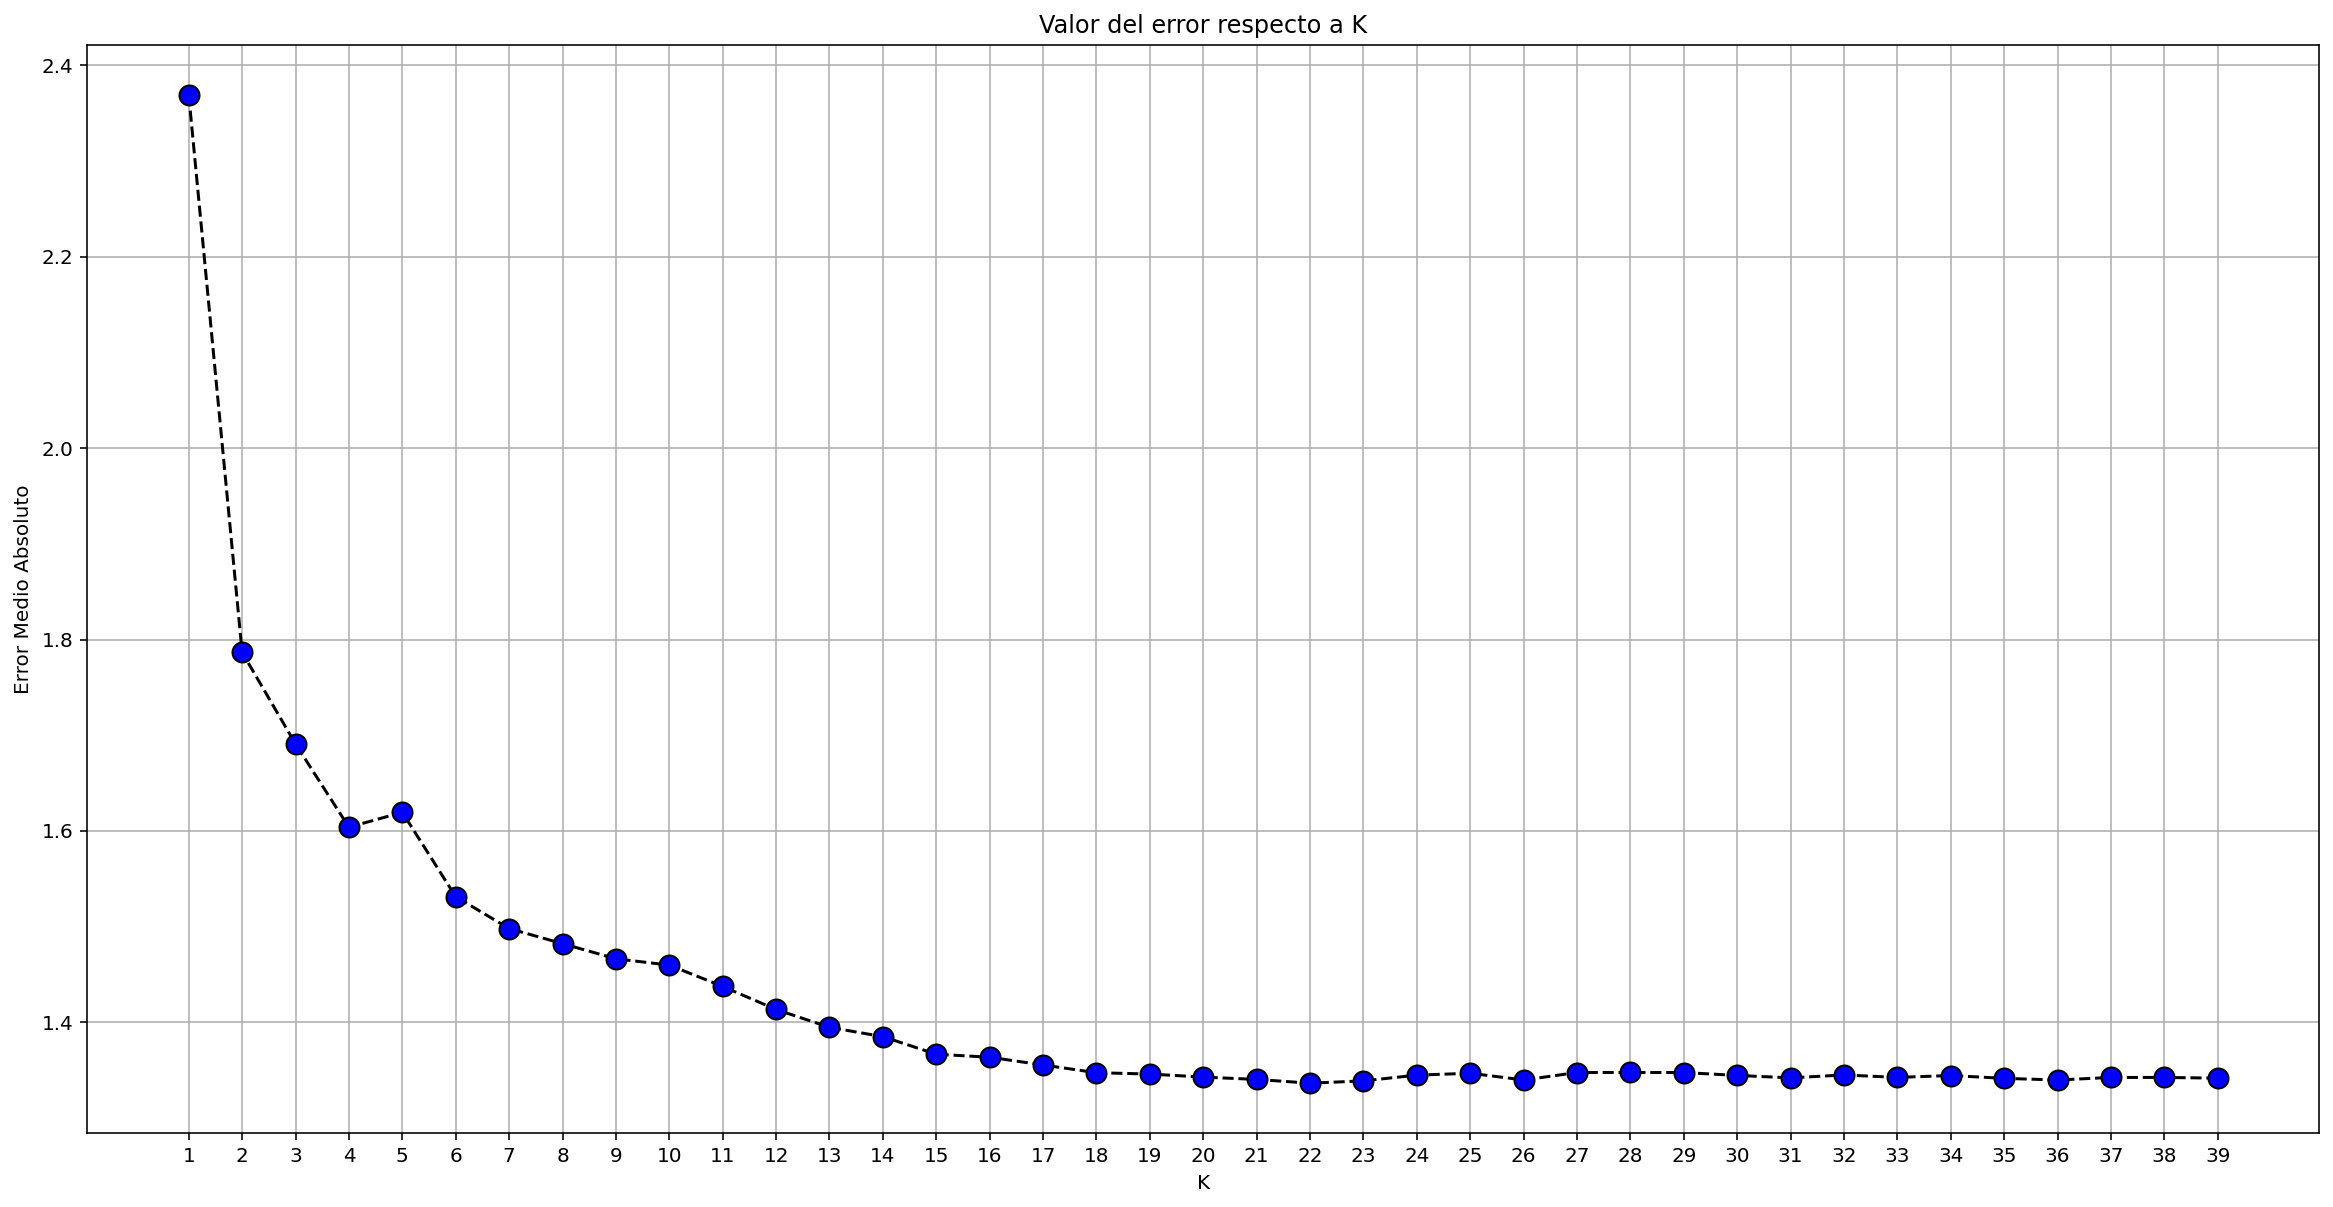

In [ ]:
plt.figure(figsize=(20, 10))  
plt.plot(K_range, error_values, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Valor del error respecto a K')  
plt.xlabel('K')  
plt.ylabel('Error Medio Absoluto')
plt.xticks(K_range)
plt.grid()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(31)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=31)

In [ ]:
y_pred = knn.predict(X_test)

kmse = mean_squared_error(y_test, y_pred)
kmae = mean_absolute_error(y_test, y_pred)
krmse = np.sqrt(kmse)
#cambiar a kNN
print('Random Forest: ')
print("Error Medio Absoluto: {}".format(kmae))
print("Error cuadrático medio: {}".format(kmse))
print("Error cuadrático medio: {}".format(krmse))

Random Forest: 
Error Medio Absoluto: 0.9139052848318463
Error cuadrático medio: 1.3420178448867537
Error cuadrático medio: 1.1584549386518035


#### **Regresión del árbol de decisión**

El modelo de regresión de árbol de decisión construye un único árbol de decisión para hacer una predicción sobre la variable dependiente, el árbol de decisión aprende de una muestra aleatoria de los datos de entrenamiento. Dado que este modelo construye sólo un árbol y este árbol utiliza una muestra aleatoria de una gran cantidad de datos, es más probable que sus resultados den errores de predicción más altos en comparación con Random Forest.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

Los resultados mostraron que el Modelo de Regresión de Árbol de Desición dio mayores errores en comparación con el Modelo de Regresión de Bosque Aleatorio como se predijo.

In [ ]:
y_pred = dt.predict(X_test)

dmse = mean_squared_error(y_test, y_pred)
dmae = mean_absolute_error(y_test, y_pred)
drmse = np.sqrt(dmse)
print('Árbol de Decisión:')
print("Error Medio Absoluto: {}".format(dmae))
print("Error cuadrático medio: {}".format(dmse))
print("Error cuadrático medio: {}".format(drmse))

Árbol de Decisión:
Error Medio Absoluto: 1.2311702127659574
Error cuadrático medio: 2.511462765957446
Error cuadrático medio: 1.5847595293789674


## **6.6 Descarga de modelos**


### **6.6.1 Descarga de modelo de predición**

In [ ]:
import pickle

In [ ]:
Pkl_Filename = "ml_model_prediction.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf, file)

### **6.6.1 Descarga de modelo de recomendació**

In [ ]:
Pkl_Filename = "ml_model_recomendation.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(kmeans10, file)

# **7. Implementación**

Ahora que nuestra canalización y modelo de aprendizaje automático están listos, comenzaremos a crear una aplicación web que pueda conectarse a ellos y generar predicciones sobre nuevos datos en tiempo real. Hay dos partes de esta implementación:

* Front-end (diseñado usando VueJS)
* Back-end (desarrollado usando FastAPI en Python)

## **7.1 Front-end de la aplicación web**


En general, el front-end de las aplicaciones web se crea con HTML. Hemos utilizado el framework  VueJS para diseñar un formulario de entrada.

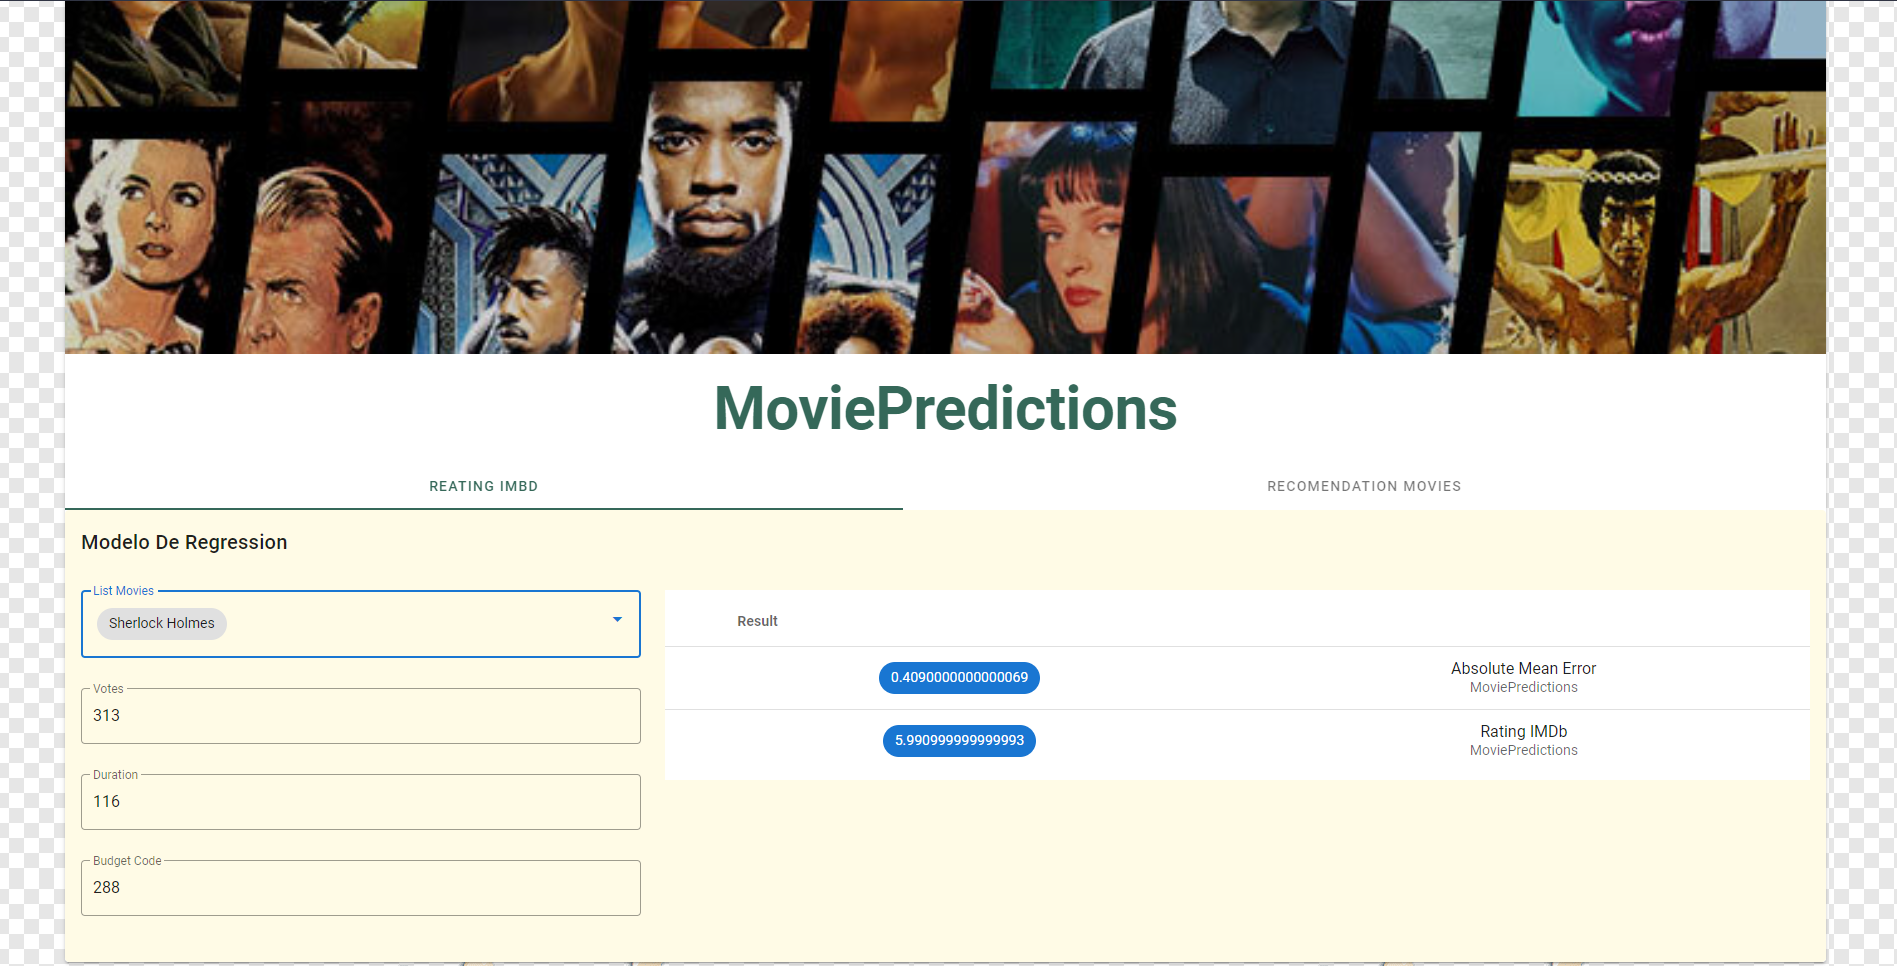

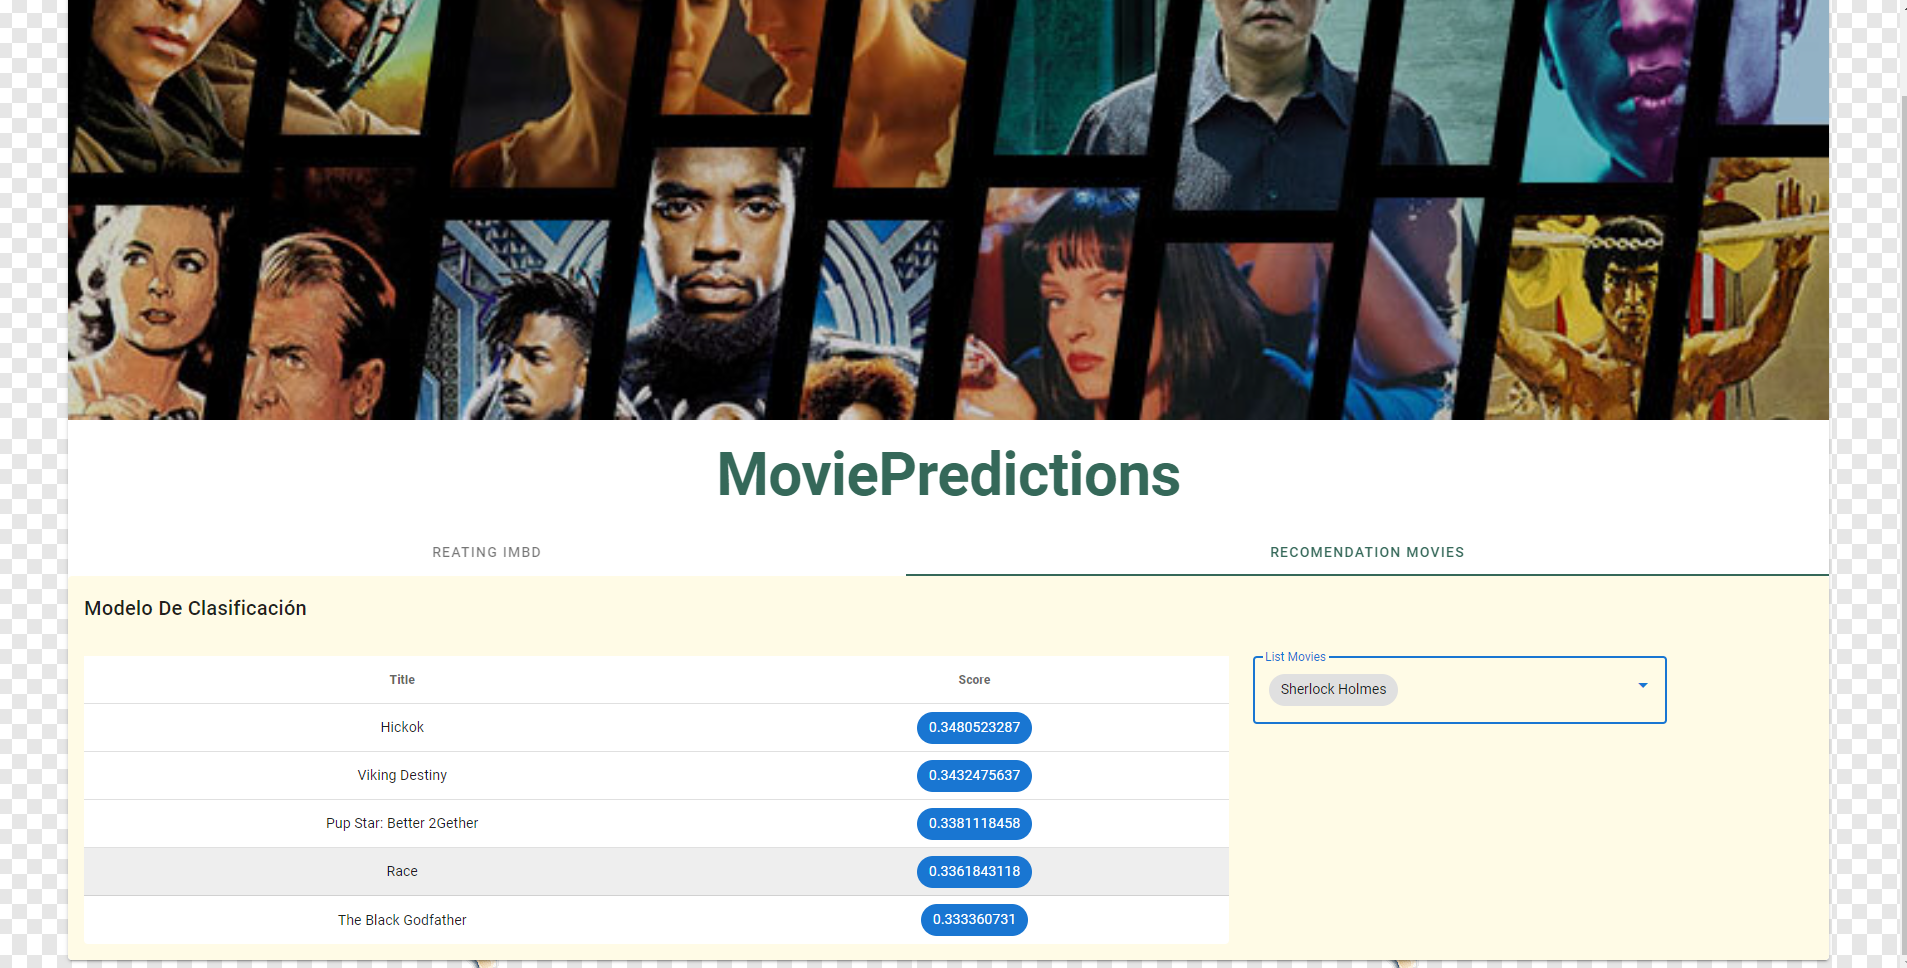

## **7.2 Back-end de la aplicación web**

El back-end de la aplicación web se desarrollo utilizando FastAPI. 

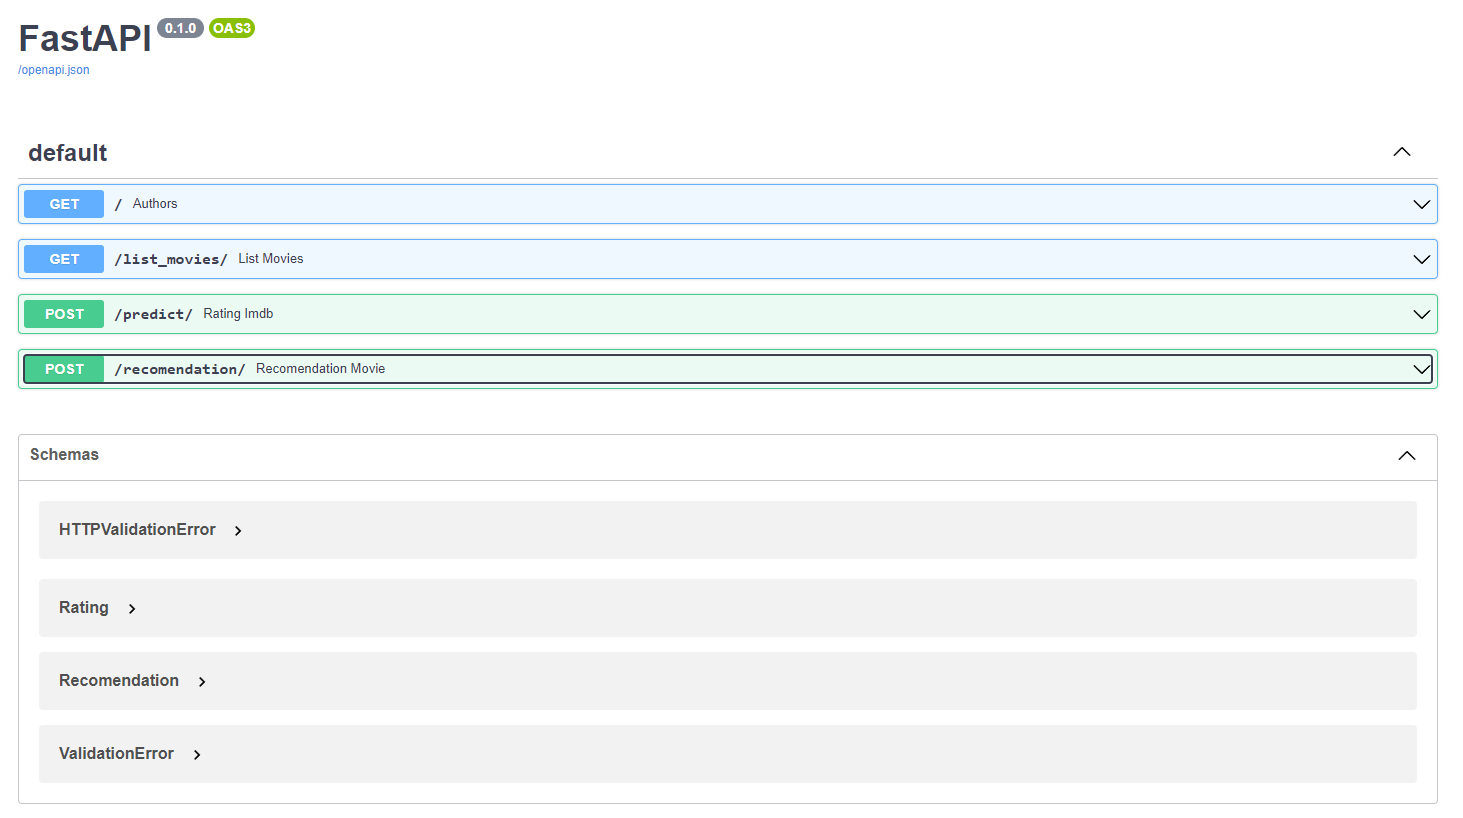

## **7.3 Repositorios**

*  **Aplicacion:** https://movie-predictions-app.herokuapp.com/
*  **API:** https://movie-predictions-server.herokuapp.com/docs